In [3]:
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
 
ms = DataReader('MS',  'yahoo', datetime(2019,1,1), datetime(2019,8,31))
returns = pd.DataFrame(np.diff(np.log(ms['Adj Close'].values)))
returns.index = ms.index.values[1:ms.index.values.shape[0]]
returns.columns = ['MS Returns']

In [4]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import datetime
from statsmodels.tsa.api import VAR

In [87]:
ms.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,40.720001,38.759998,39.020000,40.400002,10648000.0,38.395737
2019-01-03,40.220001,39.250000,40.220001,39.680000,13034500.0,37.711456
2019-01-04,41.580002,40.279999,40.500000,41.299999,14371600.0,39.251076
2019-01-07,42.160000,40.980000,41.509998,41.709999,11812400.0,39.640736
2019-01-08,42.410000,41.080002,42.299999,41.450001,11398200.0,39.393639


In [14]:
ms1=ms[['Close']]
ms1

,Close
Date,
2019-01-02,40.400002
2019-01-03,39.680000
2019-01-04,41.299999
2019-01-07,41.709999
2019-01-08,41.450001
...,...
2019-08-26,40.160000
2019-08-27,39.790001
2019-08-28,40.380001


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

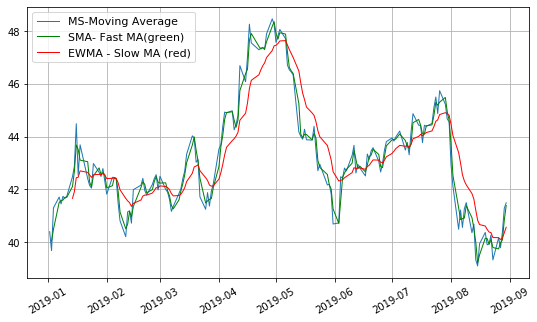

In [26]:
# Simple Moving Average 
def SMA(data, ndays): 
    SMA = pd.Series(ms['Close'].rolling(ndays).mean(), name = 'SMA') 
    data = data.join(SMA) 
    return data

# Weighted Moving Average 
def EWMA(data, ndays): 
    EMA = pd.Series(ms['Close'].ewm(span = ndays, min_periods = ndays - 1).mean(), 
                 name = 'EWMA_' + str(ndays)) 
    data = data.join(EMA) 
    return data

data = pd.DataFrame(ms) 
close = data['Close']

n = 2
SMA_MS = SMA(data,n)
SMA_MS = SMA_MS.dropna()
SMA = SMA_MS['SMA']

ew = 10
EWMA_MS = EWMA(data,ew)
EWMA_MS = EWMA_MS.dropna()
EWMA = EWMA_MS['EWMA_10']
plt.figure(figsize=(9,5))
plt.plot(ms['Close'],lw=1, label='MS-Moving Average')
plt.plot(SMA,'g',lw=1, label='SMA- Fast MA(green)')
plt.plot(EWMA,'r', lw=1, label='EWMA - Slow MA (red)')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [24]:
SMA

Date
2019-01-15    41.504000
2019-01-16    41.913000
2019-01-17    42.198000
2019-01-18    42.437000
2019-01-22    42.507000
                ...    
2019-08-26    39.903000
2019-08-27    39.813000
2019-08-28    39.918000
2019-08-29    40.137000
2019-08-30    40.292001
Name: SMA, Length: 159, dtype: float64

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

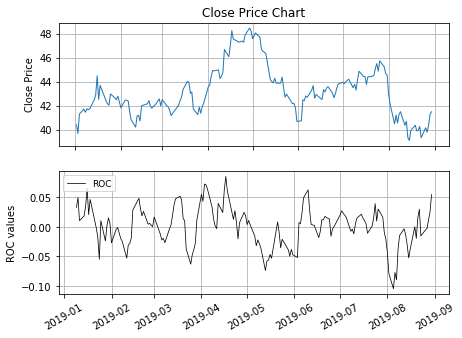

In [165]:

# Rate of Change (ROC)
def ROC(data,n):
    
    N = data['Close'].diff(n)
    D = data['Close'].shift(n)
    ROC = pd.Series(N/D,name='Rate of Change')
    data = data.join(ROC)
    return data 
 

data = pd.DataFrame(ms)
n = 5
_ROC = ROC(data,n)
ROC = _ROC['Rate of Change']

# Plotting the Price Series chart and the Ease Of Movement below
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(2, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],lw=1)
plt.title('Close Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx = fig.add_subplot(2, 1, 2)
plt.plot(ROC,'k',lw=0.75,linestyle='-',label='ROC')
plt.legend(loc=2,prop={'size':9})
plt.ylabel('ROC values')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

In [91]:
ROC

Date
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
                ...   
2019-08-26   -0.005202
2019-08-27   -0.002757
2019-08-28    0.011017
2019-08-29    0.025329
2019-08-30    0.054920
Name: Rate of Change, Length: 168, dtype: float64

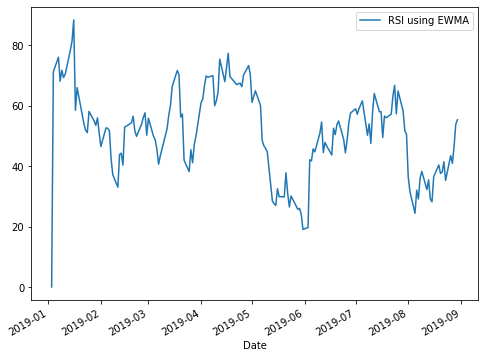

In [61]:
# Window length for moving average
window_length = 20

# Get just the adjusted close
close = ms['Close']
# Get the difference in price from previous step
delta = close.diff()
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# Calculate the EWMA
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()

# Calculate the RSI based on EWMA
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

plt.figure(figsize=(8, 6))
RSI1.plot()
plt.legend(['RSI using EWMA'])
plt.show()

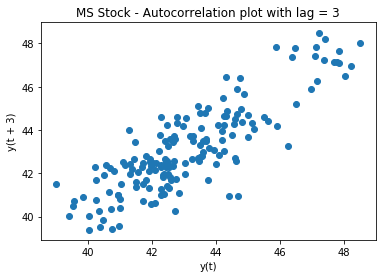

In [155]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(ms['Open'], lag=3)
plt.title('MS Stock - Autocorrelation plot with lag = 3')
plt.show()
#strong linear pattern affirming the autocorrelation/cross correlation

In [328]:
train_data, test_data = ms[0:int(len(ms)*0.7)], ms[int(len(ms)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
RMSE_error = mean_squared_error(test_data, model_predictions,squared=False)
print('Testing Mean Squared Error is {}'.format(RMSE_error)) #The RMSE of the test set is quite big denoting that the precise prediction is a hard problem

Testing Mean Squared Error is 0.6478222203373051


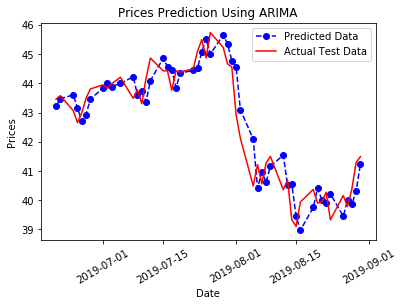

In [324]:
test_set_range = ms[int(len(ms)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Data')
plt.plot(test_set_range, test_data, color='red', label='Actual Test Data')
plt.title('Prices Prediction Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

In [325]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  166
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -168.698
Method:                       css-mle   S.D. of innovations              0.668
Date:                Fri, 30 Oct 2020   AIC                            347.397
Time:                        21:55:43   BIC                            362.957
Sample:                             1   HQIC                           353.713
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.054      0.139      0.890      -0.099       0.114
ar.L1.D.y     -0.1081      0.078     -1.388      0.165      -0.261       0.045
ar.L2.D.y      0.0954      0.079      1.202      0.229      -0.060       0.251
ar.L3.D.y      0.0575      0.079      0.725      0.468      -0.098       0.213
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3354           -0.0000j            2.3354           -0.0000
AR.2           -1.9971           -1.8599j            2.7290           -0.3807
AR.3           -1.9971           +1.8599j            2.7290            0.3807
-----------------------------------------------------------------------------
"""

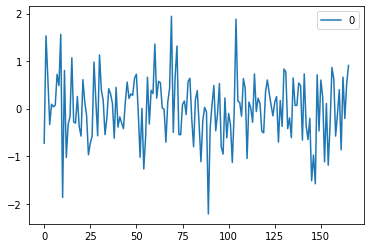

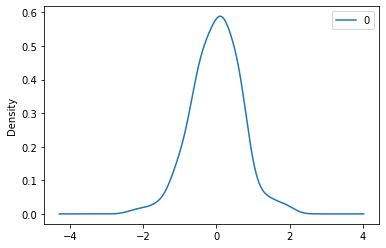

                0
count  166.000000
mean    -0.001088
std      0.669715
min     -2.215457
25%     -0.415771
50%      0.066331
75%      0.443260
max      1.943000


In [84]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [104]:
result = pd.concat([ms1, SMA, ROC, RSI1], axis=1, sort=False)
result.columns = ['Close','SMA','Rate of Change','RSI']
result

,Close,SMA,Rate of Change,RSI
Date,,,,
2019-01-02,40.400002,NaN,NaN,NaN
2019-01-03,39.680000,40.040001,NaN,0.000000
2019-01-04,41.299999,40.490000,NaN,71.320707
2019-01-07,41.709999,41.504999,NaN,76.090694
2019-01-08,41.450001,41.580000,NaN,68.146581
...,...,...,...,...
2019-08-26,40.160000,39.745001,-0.005202,43.502876
2019-08-27,39.790001,39.975000,-0.002757,40.942007
2019-08-28,40.380001,40.085001,0.011017,46.493308


In [329]:
train_data, test_data = result[0:int(len(result)*0.7)], result[int(len(result)*0.7):]
X_train = train_data.values
X_test = test_data.values
X_train_log = np.log(X_train)
X_train_diff=pd.DataFrame(np.diff(X_train_log,axis=0)).dropna()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [330]:
model = VAR(endog=X_train_diff)
#res = model.select_order(15)
model_fit = model.fit(maxlags=3)
model_fit.summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Oct, 2020
Time:                     22:04:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -23.4052
Nobs:                     50.0000    HQIC:                  -24.6365
Log likelihood:           403.055    FPE:                9.83745e-12
AIC:                     -25.3937    Det(Omega_mle):     3.90302e-12
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.007161         0.003132            2.287           0.022
L1.0         -0.698131         0.523843           -1.333           0.183
L1.1          0.302366         0.486397            0.622           0.534
L1.2          0.003960 

In [283]:
lag_order = model_fit.k_ar
nobs=len(X_test)
test=pd.DataFrame(X_test)
forecast_input = X_train_diff.values[lag_order:]
fc = model_fit.forecast(y=forecast_input, steps=len(X_test))

df_forecast = pd.DataFrame(fc, index=result.index[-nobs:], columns=result.columns+'_forecasted')
len(df_forecast)

51

In [318]:
df_fc = df_forecast.copy()
columns = train_data.columns
for col in columns:
    df_fc[str(col)+'_forecast'] = train_data[col].iloc[-1] + df_fc[str(col)+'_forecasted'].cumsum()
df_results = df_fc

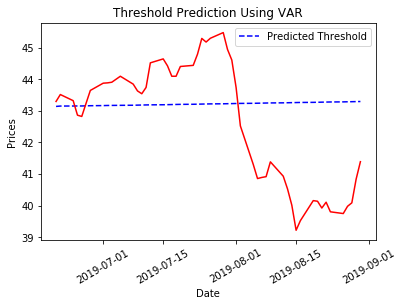

In [317]:
test_set_range = df_forecast.index
plt.plot(test_set_range, df_results.Close_forecast, color='blue', linestyle='dashed',label='Predicted Threshold')
plt.plot(test_set_range, test_data.SMA, color='red')
plt.title('Threshold Prediction Using VAR')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()